# **Predictive Analytics: Prediksi Tanaman yang Cocok Ditanam Berdasarkan Kondisi Iklim**
---

![Image Corp](https://storage.googleapis.com/kaggle-datasets-images/7367814/11736333/0dd2a975741503de21815f4405bde8b3/dataset-cover.jpg?t=2025-05-08-17-03-12)

  <style>
    body {
      font-family: Arial, sans-serif;
      margin: 40px;
      line-height: 1.6;
    }
    p {
      text-align: justify;
    }
  </style>
<p>Indonesia sebagai negara agraris memiliki potensi besar dalam sektor pertanian. Namun, produktivitas pertanian sering kali terhambat oleh kurangnya informasi yang akurat mengenai kecocokan jenis tanaman dengan kondisi lahan dan lingkungan tertentu. Banyak petani masih mengandalkan pengalaman atau perkiraan dalam menentukan tanaman yang akan ditanam, tanpa mempertimbangkan data seperti kandungan unsur hara tanah, suhu, kelembaban, pH tanah, dan curah hujan.</p>

<p>Seiring berkembangnya teknologi dan ketersediaan data, pendekatan berbasis data science dan machine learning mulai digunakan dalam mendukung pengambilan keputusan di bidang pertanian. Salah satu penerapannya adalah memprediksi jenis tanaman yang paling sesuai untuk ditanam berdasarkan kondisi lingkungan dan tanah yang tersedia.</p>

<p>Dataset ini dikembangkan untuk menjawab kebutuhan tersebut. Dengan memanfaatkan informasi seperti kandungan nitrogen (N), fosfor (P), kalium (K), suhu, kelembaban, pH tanah, dan curah hujan, model machine learning dapat dilatih untuk merekomendasikan tanaman yang paling sesuai. Hal ini bertujuan untuk membantu petani meningkatkan hasil panen, mengurangi risiko gagal panen, serta mendukung ketahanan pangan nasional.</p>

<p>Melalui proyek ini, diharapkan tercipta sistem rekomendasi yang tidak hanya bermanfaat secara praktis di lapangan, tetapi juga mendorong transformasi pertanian tradisional menuju pertanian cerdas (smart agriculture) berbasis teknologi dan data.</p>

# Import Library

Melakukan import pustakan yang akan digunakan dalam proyek

In [ ]:
# =====================
# Data Manipulation
# =====================
import numpy as np
import pandas as pd

# =====================
# Visualization
# =====================
import matplotlib.pyplot as plt
import seaborn as sns

# =====================
# Modeling - Classifiers
# =====================
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

# =====================
# Modeling - Evaluation
# =====================
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    silhouette_score
)

# =====================
# Modeling - Preprocessing
# =====================
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from scipy.stats import skew



# Data Understanding

Memahami informasi dalam data dan menentukan kualitas dari data

## Data Loading

Mengunduh dataset dari [Kaggle](https://www.kaggle.com/)

**Informasi Dataset**

| Jenis        | Keterangan                                                                                           |
|--------------|------------------------------------------------------------------------------------------------------|
| Title        | Crop Recommendation Dataset                                                                          |
| Source       | [Kaggle](https://www.kaggle.com/datasets/madhuraatmarambhagat/crop-recommendation-dataset/data)                  |
| Maintainer   | [Atharva Ingle](https://www.kaggle.com/madhuraatmarambhagat)                                                 |
| License      | [Apache 2.0](https://www.apache.org/licenses/LICENSE-2.0)                                                                                |
| Visibility   | Publik                                                                                               |
| Tags         | Business, Beginner, Classification, Intermediate, Advanced, Agriculture                     |
| Usability    | 10.00                                                                                                |


In [129]:
import kagglehub
path = kagglehub.dataset_download("madhuraatmarambhagat/crop-recommendation-dataset")
df = pd.read_csv(path + "/Crop_recommendation.csv")
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


## Exploratory Data Analysis (EDA)

Menginvestigasi data untuk memahami struktur, pola, dan karakteristik dari data

### Deskripsi Data

In [130]:
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


| Nama Fitur     | Deskripsi                                    | Satuan  |
|----------------|----------------------------------------------|---------|
| `N`            | Kandungan Nitrogen dalam tanah               | mg/kg   |
| `P`            | Kandungan Fosfor dalam tanah                 | mg/kg   |
| `K`            | Kandungan Kalium dalam tanah                 | mg/kg   |
| `temperature`  | Suhu rata-rata lingkungan                    | °C      |
| `humidity`     | Kelembaban relatif rata-rata                 | %       |
| `ph`           | Derajat keasaman tanah (pH)                  | -       |
| `rainfall`     | Curah hujan rata-rata tahunan                | mm      |
| `label`        | Jenis tanaman yang paling cocok ditanam berdasarkan kondisi tersebut | Kategori |

Menampilkan jumlah kolom numerik dan kategorik

In [132]:
print(f"jumlah kolom numerik: {df.select_dtypes(include=['int64', 'float64']).shape[1]}")
print(f"jumlah kolom kategorikal: {df.select_dtypes(include=['object']).shape[1]}")

jumlah kolom numerik: 7
jumlah kolom kategorikal: 1


Menampilkan statistik deskriptif dari data numerik untuk mengetahui sebaran dari data

In [ ]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


Menampilkan jumlah baris dan kolom dari data

In [134]:
print(f"jumlah data: {df.shape[0]}")
print(f"jumlah kolom: {df.shape[1]}")

jumlah data: 2200
jumlah kolom: 8


### Outliers and Missing Values

Menampilkan jumlah nilai yang terduplikat dan hilang

In [135]:
print(f"Jumlah nilai duplikat: {df.duplicated().sum()}")
print(f"Jumlah nilai yang hilang: {df.isnull().sum().sum()}")

Jumlah nilai duplikat: 0
Jumlah nilai yang hilang: 0


Mengekplorasi sebaran data dari kolom numerik dengan visuali boxplot

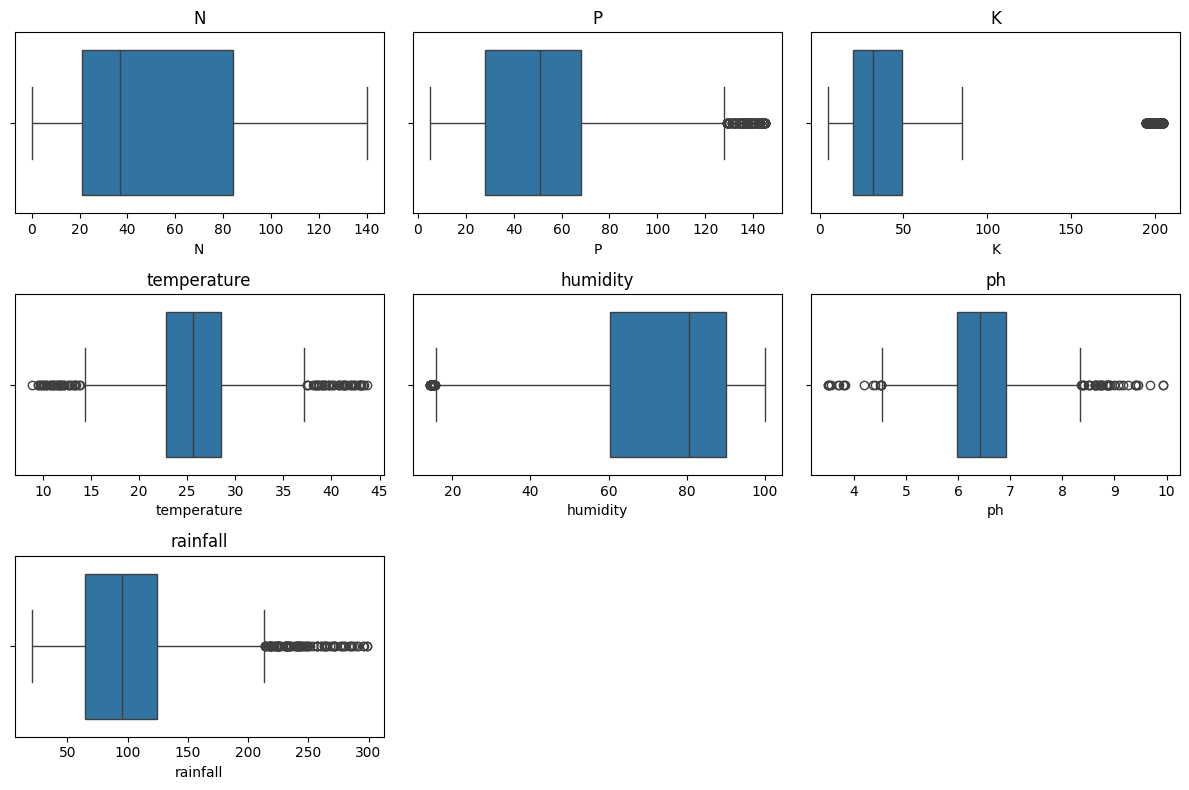

In [136]:
df_numeric = df.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 8))
for col in df_numeric.columns:
    plt.subplot(3, 3, df_numeric.columns.get_loc(col) + 1)
    sns.boxplot(x=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

Dari visualisasi boxplot diperoleh bahwa semua kolom numerik kecuali kolom N (kandungan nitrogen dalam tanah) memiliki outlier (nilai ekstrem) yang dapat memengaruhi hasil analisis dan pemodelan data. Oleh karena itu, digunakan metode interquartile range (IQR) unruk mendeteksi dan menghapus outlier pada data numerik

In [137]:
Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)
IQR = Q3 - Q1

filter_outliers = ~((df_numeric < (Q1 - 1.5 * IQR)) | (df_numeric > (Q3 + 1.5 * IQR))).any(axis=1)
df = df[filter_outliers]
print(f"Jumlah data setelah menghapus outlier: {df.shape[0]}")

Jumlah data setelah menghapus outlier: 1768


### Univariate Analysis

Membuat visualisasi histogram untuk mengetahui sebaran data setelah dilakukan filter terhadap outlier pada kolom numerik

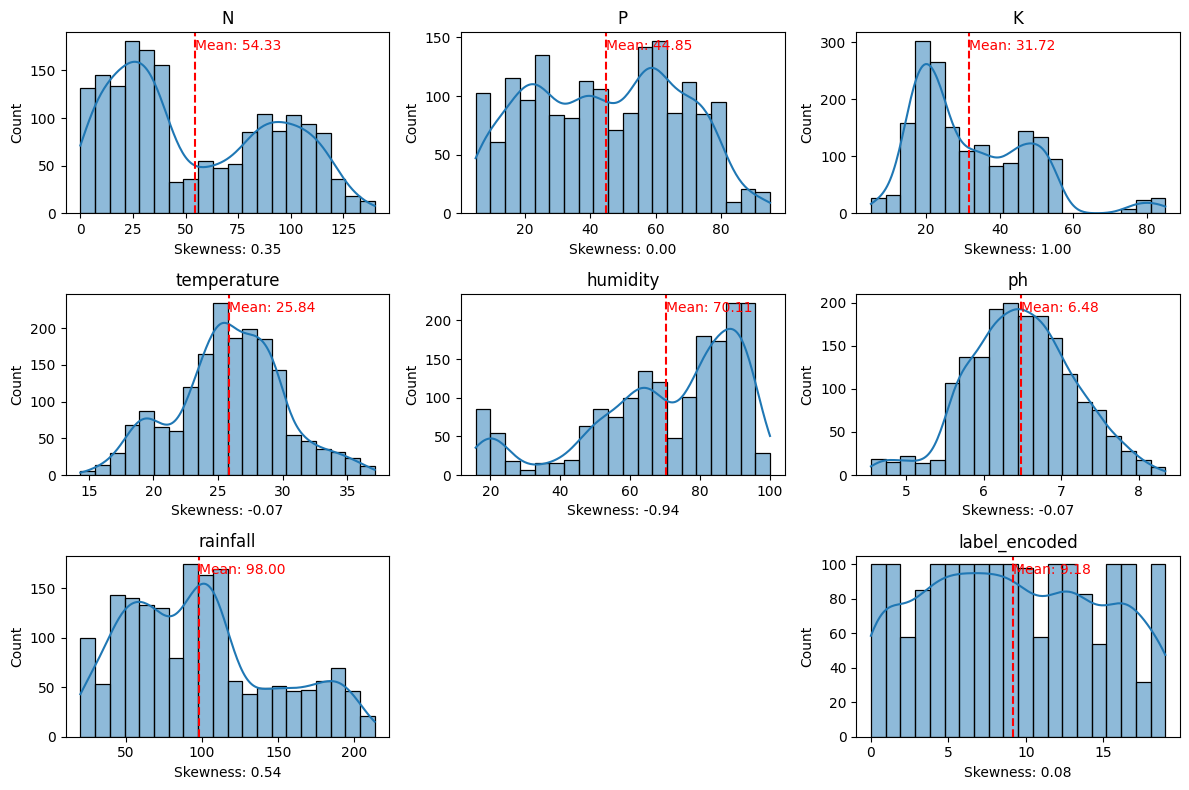

In [162]:
df_numeric_filtered = df.drop(columns=['label'])
plt.figure(figsize=(12, 8))

for col in df_numeric_filtered.columns:
    plt.subplot(3, 3, df.columns.get_loc(col) + 1)
    sns.histplot(df[col], bins=20, kde=True)
    
    mean_val = df[col].mean()
    skew_val = skew(df[col].dropna())
    
    plt.axvline(mean_val, color='r', linestyle='--')
    plt.title(col)
    plt.text(mean_val, plt.gca().get_ylim()[1]*0.9, f"Mean: {mean_val:.2f}", color='r')
    plt.xlabel(f'Skewness: {skew_val:.2f}')

plt.tight_layout()
plt.show()


| Nama Fitur    | Mean  | Skewness | Keterangan                                                        |
|---------------|-------|----------|------------------------------------------------------------------|
| `N`           | 54.33 | 0.35     | Distribusi sedikit miring ke kanan, relatif mendekati simetris.  |
| `P`           | 44.85 | 0.00     | Distribusi sangat simetris dengan data tersebar cukup merata.    |
| `K`           | 31.72 | 1.00     | Distribusi miring ke kanan dengan ekor data lebih panjang.       |
| `temperature` | 25.84 | -0.07    | Distribusi cukup normal dengan sedikit kemiringan ke kiri.       |
| `humidity`    | 70.11 | -0.94    | Distribusi miring ke kiri dengan ekor data lebih panjang.        |
| `ph`          | 6.48  | -0.07    | Distribusi mendekati normal dan hampir simetris.                 |
| `rainfall`    | 98.00 | 0.54     | Distribusi sedikit miring ke kanan.                              |
| `label encoded`| 9.18 | 0.08     | Data numerik hasil encoding dengan distribusi cukup simetris.    |


Membuat countplot kolom target untuk mengerahui sebaran data untuk masing-masing kelas

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'rice'),
  Text(1, 0, 'maize'),
  Text(2, 0, 'chickpea'),
  Text(3, 0, 'kidneybeans'),
  Text(4, 0, 'pigeonpeas'),
  Text(5, 0, 'mothbeans'),
  Text(6, 0, 'mungbean'),
  Text(7, 0, 'blackgram'),
  Text(8, 0, 'lentil'),
  Text(9, 0, 'pomegranate'),
  Text(10, 0, 'banana'),
  Text(11, 0, 'mango'),
  Text(12, 0, 'watermelon'),
  Text(13, 0, 'muskmelon'),
  Text(14, 0, 'orange'),
  Text(15, 0, 'papaya'),
  Text(16, 0, 'coconut'),
  Text(17, 0, 'cotton'),
  Text(18, 0, 'jute'),
  Text(19, 0, 'coffee')])

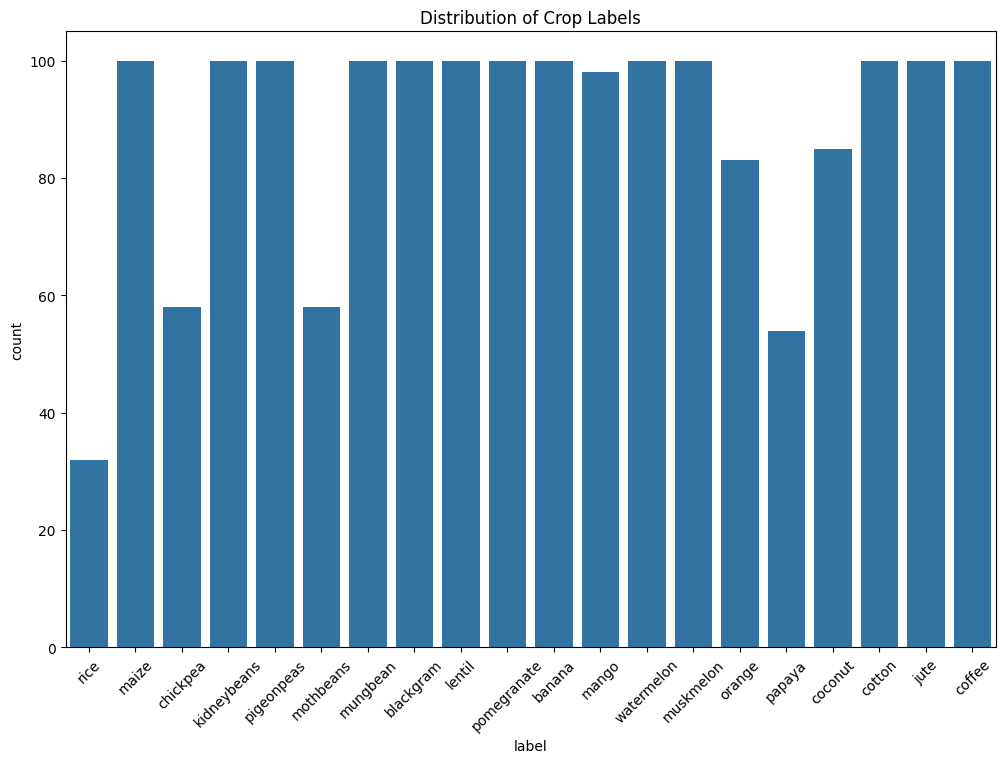

In [161]:
plt.figure(figsize=(12, 8))
sns.countplot(x='label', data=df)
plt.title('Distribution of Crop Labels')
plt.xticks(rotation=45)

### Multivariate Analysis

Membuat pairplot untuk mengetahui pola hubungan antara pasangan data pada kolom numerik

<Figure size 1200x800 with 0 Axes>

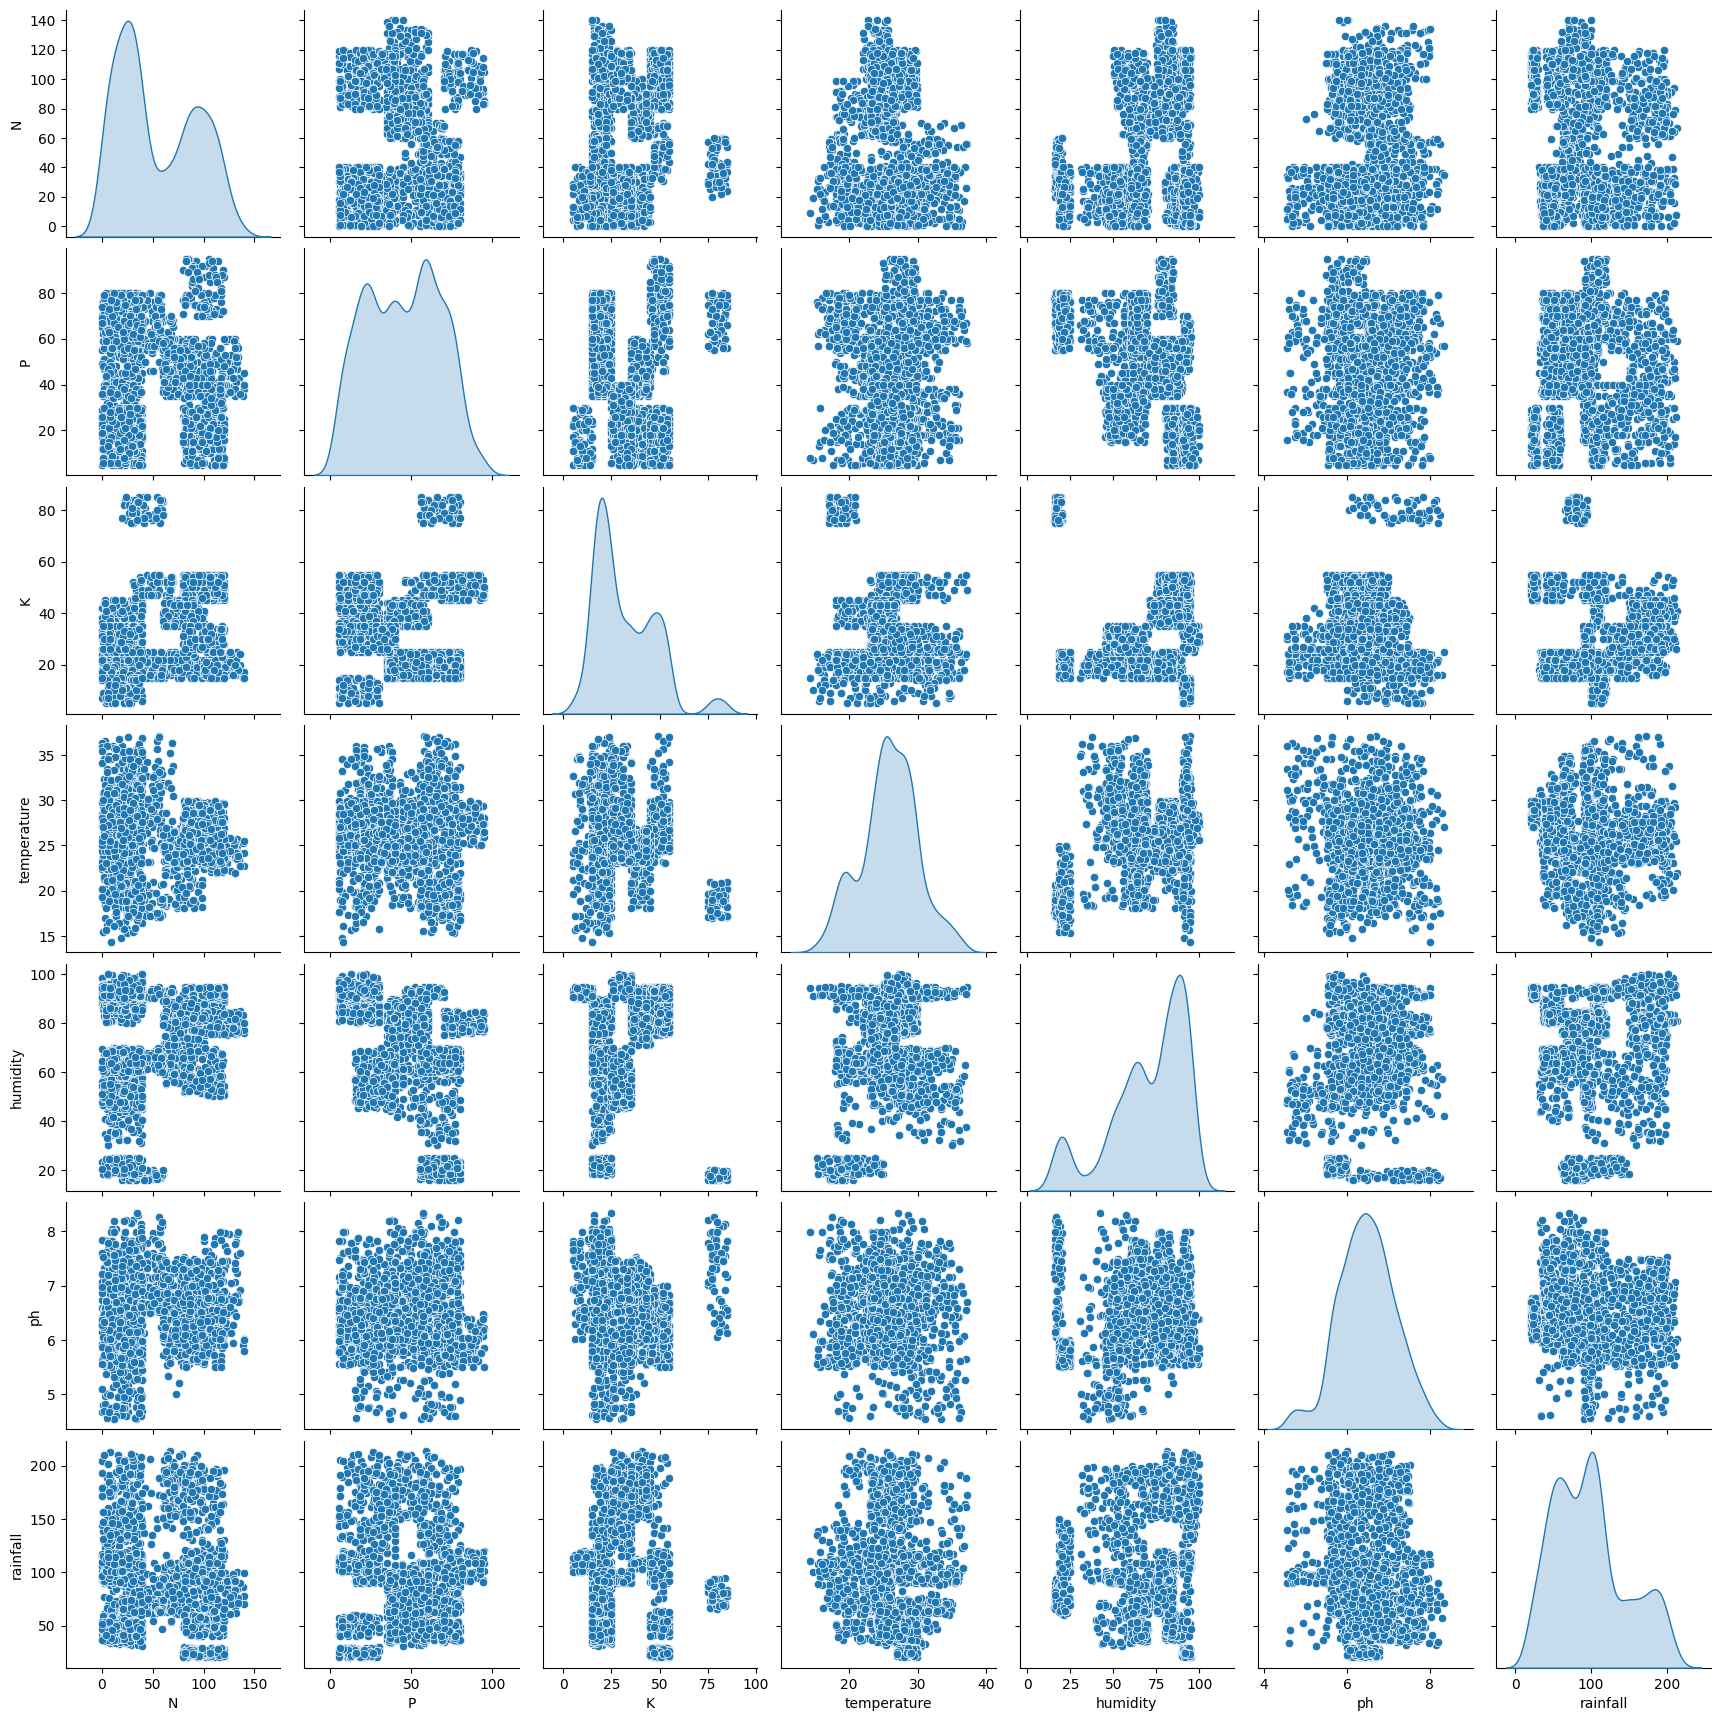

In [140]:
plt.figure(figsize=(12, 8))
sns.pairplot(df_numeric_filtered, diag_kind='kde')
plt.show()

Membuat heatmap koralasi untuk mengetahui kekuatan hubungan antara pasangan data pada kolom numerik

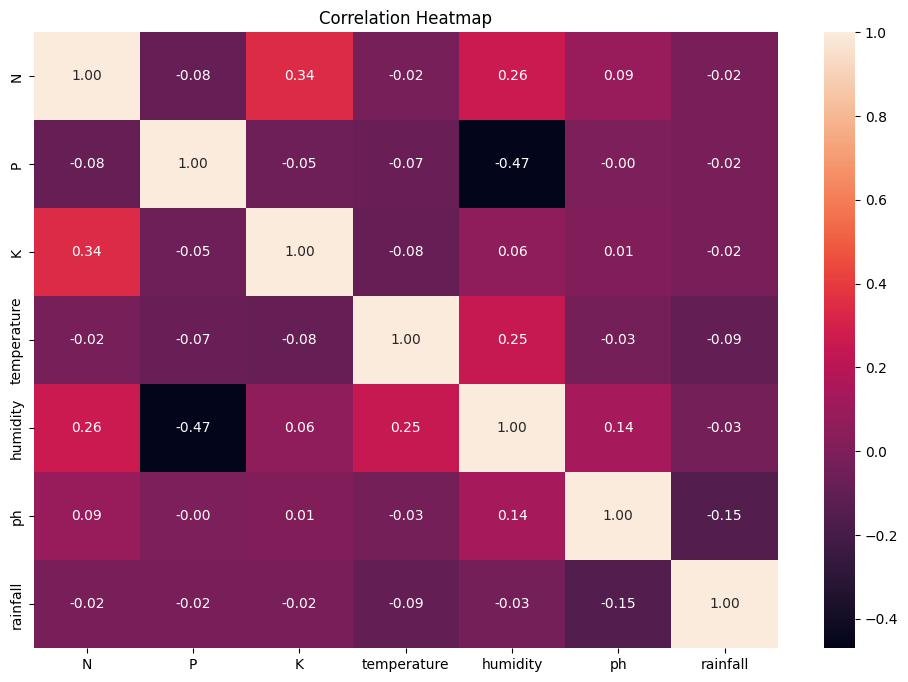

In [141]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_numeric_filtered.corr(), annot=True, fmt=".2f",)
plt.title("Correlation Heatmap")
plt.show()

# Data Preparation

Mempersiapkan data untuk membuat model machine learning

## Data Cleaning

Memeriksa jumlah kelas dan sebaran data dari tiap kelas

In [142]:
print(f"Jumlah kelas: {df.label.nunique()}")
print(f"Jumlah data per kelas:\n{df.label.value_counts()}")

Jumlah kelas: 20
Jumlah data per kelas:
label
maize          100
kidneybeans    100
mungbean       100
pigeonpeas     100
coffee         100
cotton         100
blackgram      100
lentil         100
banana         100
pomegranate    100
muskmelon      100
watermelon     100
jute           100
mango           98
coconut         85
orange          83
mothbeans       58
chickpea        58
papaya          54
rice            32
Name: count, dtype: int64


Mengubah label kategorik menjadi fitur numerik supaya dapat dikenali oleh model

C:\Users\acer\AppData\Local\Temp\ipykernel_9844\1787693574.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label_encoded'] = df['label'].astype('category').cat.codes


<Axes: xlabel='label_encoded'>

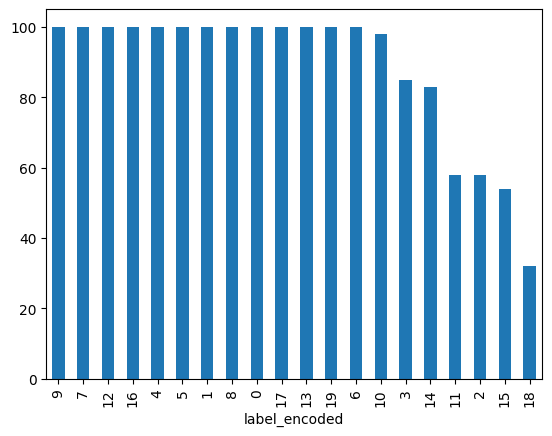

In [143]:
df['label_encoded'] = df['label'].astype('category').cat.codes
df['label_encoded'].value_counts().plot(kind='bar')

memisah data menjadi X (variabel prediktor) dan Y (variabel respons)

In [144]:
X = df.drop(columns=['label', 'label_encoded'])
y = df['label_encoded']

print(f"Jumlah data: {X.shape[0]}")
print(f"Jumlah fitur: {X.shape[1]}")
print(f"Jumlah kelas: {y.nunique()}")

Jumlah data: 1768
Jumlah fitur: 7
Jumlah kelas: 20


## Train-Test Split

Membagi data menjadi dua bagian sebagai data latih (train) dan data uji (test)

In [145]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"Jumlah data keseluruhan: {df.shape[0]}")
print(f"Jumlah data latih: {X_train.shape[0]}")
print(f"Jumlah data uji: {X_test.shape[0]}")

Jumlah data keseluruhan: 1768
Jumlah data latih: 1414
Jumlah data uji: 354


## Standarisasi

Menlakukan scaling pada data supaya model machine learning memiliki perporma yang lebih baik

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Development

Melatih model klasifikasi machine learning untuk membuat prediksi

In [164]:
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'KNN': KNeighborsClassifier(n_neighbors=5)
}

results = []
n_classes = len(np.unique(y_train))

for name, model in models.items():
    model.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    # Inisialisasi y_proba
    y_proba = None

    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)
    else:
        try:
            y_score = model.decision_function(X_test)
            if len(y_score.shape) == 1:
                y_score = (y_score - y_score.min()) / (y_score.max() - y_score.min())
                y_proba = np.vstack([1 - y_score, y_score]).T
            else:
                y_proba = y_score
        except:
            y_proba = None

    if y_proba is not None and len(y_proba.shape) == 2:
        try:
            roc = roc_auc_score(y_test, y_proba, multi_class='ovr')
        except:
            roc = np.nan
    else:
        roc = np.nan

    # Tentukan apakah overfitting berdasarkan selisih > 0.1
    overfit_status = "Overfitting" if train_acc - test_acc > 0.1 else "No"

    results.append({
        'Model': name,
        'Train Accuracy': round(train_acc, 3),
        'Test Accuracy': round(test_acc, 3),
        'ROC AUC': round(roc, 3) if not np.isnan(roc) else np.nan,
        'Overfitting': overfit_status
    })

# Tampilkan hasil
results_df = pd.DataFrame(results).sort_values('ROC AUC', ascending=False)

c:\Users\acer\Desktop\Submission-Machine-Learning-Terapan\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:15:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


# Evaluasi

Mengevaluasi model klasifikasi stelah dilakukan pelatihan

Evaluasi model menggunakan metrik ROC AUC karena metrik ini dapat mengukur **kemampuan model dalam membedakan antara kelas positif dan negatif secara menyeluruh, tanpa bergantung pada satu nilai threshold tertentu**. ROC AUC mempertimbangkan seluruh kemungkinan ambang batas klasifikasi dan memberikan gambaran umum tentang performa model dalam hal trade-off antara sensitivitas (*True Positive Rate*) dan spesifisitas (*1 - False Positive Rate*).

In [167]:
results_sorted = results_df.sort_values('ROC AUC', ascending=False)
results_sorted

,Model,Train Accuracy,Test Accuracy,ROC AUC,Overfitting
1,Random Forest,1.000,0.994,1.000,No
2,XGBoost,1.000,0.992,0.999,No
3,KNN,0.979,0.969,0.998,No
0,Decision Tree,1.000,0.997,0.996,No


Interpretasi:
- **Random Forest** dan **Decision Tree** mencapai akurasi sempurna (1.000) pada data pelatihan, menunjukkan model mampu menangkap pola dengan sangat baik. Namun, tidak terjadi overfitting karena akurasi pada data uji tetap sangat tinggi (di atas 0.99), dan nilai ROC AUC mendekati 1.000.
- **XGBoost** juga menunjukkan performa luar biasa, meskipun sedikit lebih rendah dibanding Random Forest dan Decision Tree. Model ini tetap sangat andal dengan ROC AUC 0.999 dan tidak mengalami overfitting.
- **KNN** memiliki akurasi train dan test yang lebih rendah dibanding model lain, namun tetap tinggi dan seimbang, menunjukkan generalisasi yang baik. Nilai ROC AUC juga sangat tinggi (0.998), menandakan bahwa model ini tetap mampu membedakan kelas dengan baik.

Kesimpulan:
Semua model menunjukkan performa sangat baik tanpa indikasi overfitting. Random Forest dan Decision Tree tampil sebagai model terbaik dengan akurasi tinggi dan stabilitas yang sangat baik. XGBoost juga merupakan pilihan yang kuat dengan sedikit kompromi pada akurasi test. KNN memberikan alternatif yang lebih ringan namun tetap efektif.

Membuat visualisasi performa dari model

C:\Users\acer\AppData\Local\Temp\ipykernel_9844\2170737730.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Model', x='ROC AUC', data=results_sorted, palette='viridis')


Text(0.5, 1.0, 'Model Comparison - ROC AUC')

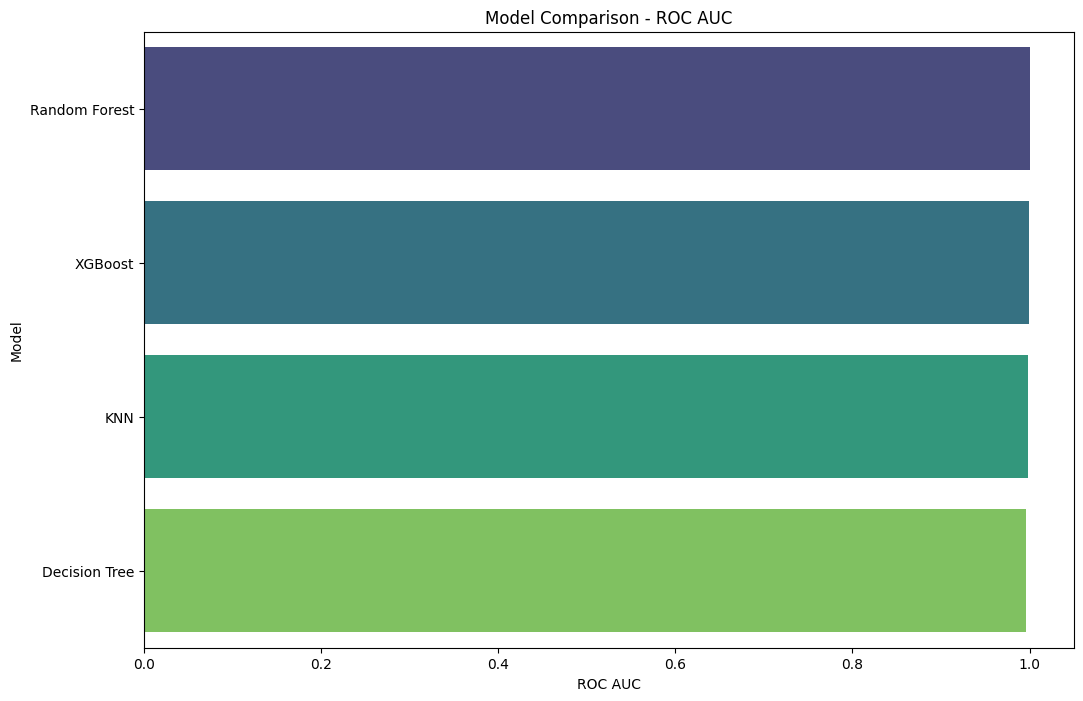

In [168]:
plt.figure(figsize=(12, 8))
sns.barplot(y='Model', x='ROC AUC', data=results_sorted, palette='viridis')
plt.title('Model Comparison - ROC AUC')